# Exploratory Data Analysis: Japanese Politeness Classifier

This notebook explores the labeled subtitle dataset used to train a classifier that predicts the level of politeness in Japanese dialogue. It includes basic statistics, label distributions, sentence lengths, and example lines from each class.


The goal is to better understand the structure and characteristics of the dataset before model training. We'll answer:
- How balanced are the politeness classes?
- What are the typical sentence lengths?
- Are there clear differences between classes?

This dataset classifies Japanese dialogue lines into three politeness levels:

| Label | Meaning          | Japanese Term | Description |
|-------|------------------|----------------|-------------|
| **0** | Casual            | タメ口         | Informal language often used with friends, peers, or in emotional/urgent situations. Includes slang, blunt commands, and casual endings. |
| **1** | Neutral / Plain   | 普通           | Standard/plain form. Not overtly rude or polite. Often used in everyday narration, internal thoughts, or when addressing someone neutrally. |
| **2** | Polite / Formal   | 敬語           | Polite speech using desu/masu forms, honorifics, or respectful expressions. Common in professional, respectful, or distant interactions. |

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r"G:\Python Projects\politeness-classifier-jp\data\processed\BunnyGirl300.csv")

In [17]:
df.head(5)

,text,label
0,おい ムロ ちょっと来てくれ！,0.0
1,何か出てきやがった,0.0
2,あ…,1.0
3,なっ なんだ これは…,1.0
4,ムロ あんたの言ったとおりだ,0.0


In [18]:
df = df.dropna()

In [19]:
df["label"].value_counts()

label
2.0    356
0.0    240
1.0    211
Name: count, dtype: int64

In [20]:
df.shape

(807, 2)

## Class Distribution

Let's visualize how many samples we have for each politeness level to check for class imbalance.


<Axes: xlabel='label', ylabel='count'>

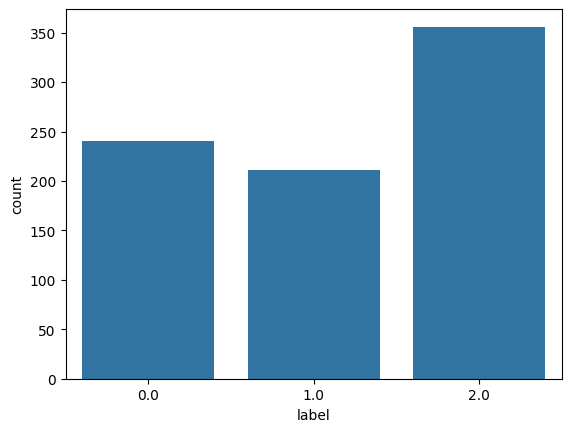

In [21]:
sns.countplot(data=df, x="label")

## Sentence Length Analysis

We examine the distribution of sentence lengths (in characters) to understand the input complexity and check for outliers.

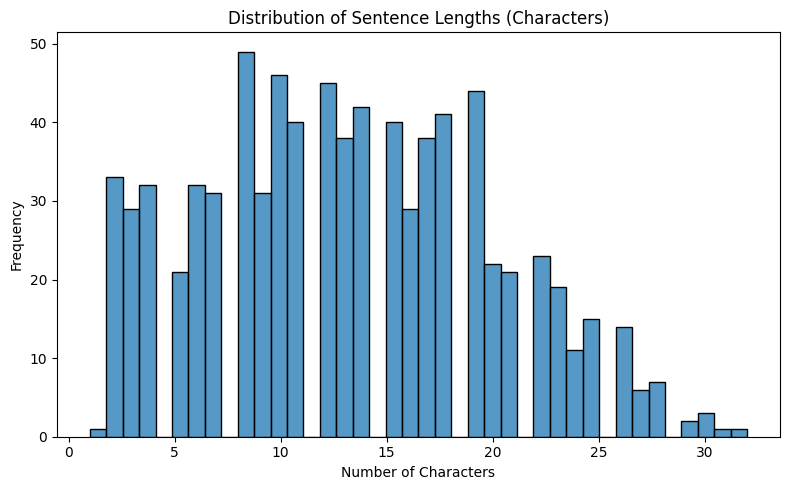

In [22]:
# Add a sentence length column
df["length"] = df["text"].str.len()

# Plot histogram of lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="length", bins=40)
plt.title("Distribution of Sentence Lengths (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Sentence Length by Politeness Level (Boxplot)

The boxplot below compares the number of characters per sentence across the three politeness levels:

- **Casual (タメ口)**
- **Neutral (普通)** 
- **Polite (敬語)** 

This visualization helps us understand whether sentence length correlates with the level of formality, which may influence model performance.

C:\Users\Daviidcito\AppData\Local\Temp\ipykernel_1444\972842030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="length", palette="pastel")


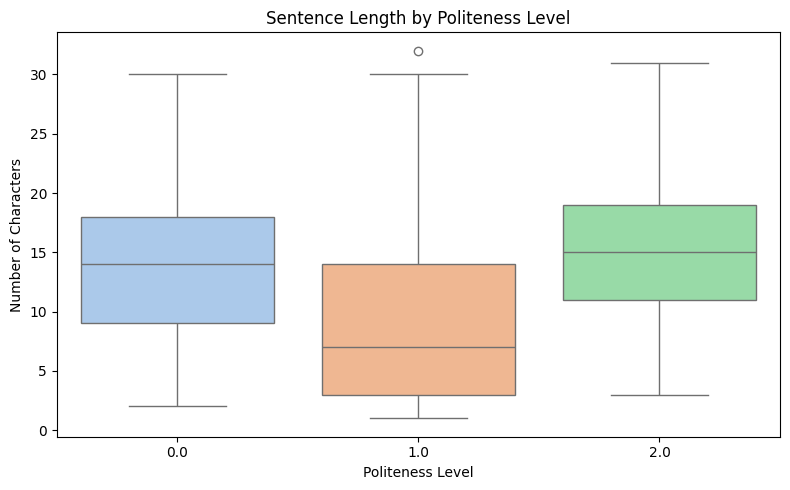

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="label", y="length", palette="pastel")
plt.title("Sentence Length by Politeness Level")
plt.xlabel("Politeness Level")
plt.ylabel("Number of Characters")
plt.tight_layout()
plt.show()

### Observations from Boxplot

Contrary to common assumptions, **casual (タメ口)** speech in this dataset is **not significantly shorter** than polite speech. In fact, casual lines often contain expressive or emotional phrasing that increases sentence length.

Interestingly, **neutral (普通)** sentences are the **shortest on average** in this dataset. This may be because:
- They often represent narration, inner thoughts, or scene-setting
- They tend to be more concise and lack emotional exaggeration or honorific structures

**Conclusion:** Sentence length alone is not a reliable indicator of politeness level in this dataset. The classifier must learn from **linguistic features**, such as grammar, particles, and verb endings, rather than relying on simple heuristics like sentence length.

## Sample Sentences per Politeness Level

Below are five randomly selected sentences from each politeness category in the dataset:

- **Casual (タメ口):** Informal, used among friends or in relaxed settings
- **Neutral (普通):** Plain speech, often used in narration or internal thoughts
- **Polite (敬語):** Formal speech, includes honorifics and respectful grammar

These samples help us verify that the labels reflect meaningful linguistic patterns, and give us qualitative insight into how politeness manifests in Japanese dialogue.

In [24]:
# Define label mapping
label_map = {
    0: "Casual (タメ口)",
    1: "Neutral (普通)",
    2: "Polite (敬語)"
}

# Add human-readable label names
df["label_name"] = df["label"].map(label_map)

# Sample 5 rows from each label class
preview_df = (
    df.groupby("label_name", group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 5), random_state=42))
    .reset_index(drop=True)
)

# Show result (in local environment use this)
display(preview_df)

C:\Users\Daviidcito\AppData\Local\Temp\ipykernel_1444\1793809694.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 5), random_state=42))


,text,label,length,label_name
0,出してくれ！ 急げ！,0.0,10,Casual (タメ口)
1,アハハハ… 勘弁してやれよ ムロ,0.0,16,Casual (タメ口)
2,やったるぜ！,0.0,6,Casual (タメ口)
3,へえ 次の戦闘 楽しみだな,0.0,13,Casual (タメ口)
4,お前のことだ,0.0,6,Casual (タメ口)
5,ギアたちが戦いに 集中できるよう,1.0,16,Neutral (普通)
6,なんだ あいつ！,1.0,8,Neutral (普通)
7,何より ガドルとの戦いは 終わらない,1.0,18,Neutral (普通)
8,お父さんだって…,1.0,8,Neutral (普通)
9,うん…,1.0,3,Neutral (普通)


## Temporary Conclusion

From this initial exploratory data analysis, we observe that:

- **All three politeness levels** (Casual, Neutral, Polite) are present in the dataset.
- **Sentence length** varies, but contrary to expectations, casual speech is not always the shortest — in fact, **neutral sentences** are the shortest on average in this subset.
- A **balanced mix of short and long sentences** exists across all labels, indicating the need for context-aware modeling (e.g., BERT) over simple heuristics like length.

Next steps involve deeper token-level analysis, improving label balance, and preparing the dataset for model training.

In [ ]:
df = df.iloc[:, :3]
df.to_csv(r"G:\Python Projects\politeness-classifier-jp\data\processed\BunnyGirl300-Preprocessed.csv", index=False)